In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
steam_review = pd.read_csv("Datasets/steam_reviews.csv")

In [43]:
steam_review.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


In [44]:
steam_review.describe()

,funny,helpful,hour_played
count,4.348910e+05,434891.000000,434891.000000
mean,5.333024e+05,1.004114,364.130773
std,4.785640e+07,59.462935,545.961198
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,62.000000
50%,0.000000e+00,0.000000,190.000000
75%,0.000000e+00,0.000000,450.000000
max,4.294967e+09,28171.000000,31962.000000


In [45]:
steam_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434891 entries, 0 to 434890
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             434891 non-null  object
 1   funny                   434891 non-null  int64 
 2   helpful                 434891 non-null  int64 
 3   hour_played             434891 non-null  int64 
 4   is_early_access_review  434891 non-null  bool  
 5   recommendation          434891 non-null  object
 6   review                  433375 non-null  object
 7   title                   434891 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 23.6+ MB


In [46]:
steam_review.isnull().sum()

date_posted                  0
funny                        0
helpful                      0
hour_played                  0
is_early_access_review       0
recommendation               0
review                    1516
title                        0
dtype: int64

In [47]:
steam_review = steam_review.dropna()

In [48]:
steam_review.isnull().sum()

date_posted               0
funny                     0
helpful                   0
hour_played               0
is_early_access_review    0
recommendation            0
review                    0
title                     0
dtype: int64

In [49]:
steam_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433375 entries, 0 to 434890
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   date_posted             433375 non-null  object
 1   funny                   433375 non-null  int64 
 2   helpful                 433375 non-null  int64 
 3   hour_played             433375 non-null  int64 
 4   is_early_access_review  433375 non-null  bool  
 5   recommendation          433375 non-null  object
 6   review                  433375 non-null  object
 7   title                   433375 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 26.9+ MB


In [50]:
steam_review.recommendation.value_counts()

Recommended        302751
Not Recommended    130624
Name: recommendation, dtype: int64

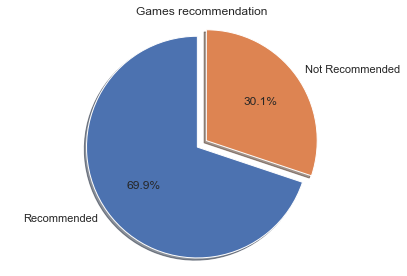

In [51]:
graph_sizes = [steam_review.recommendation.value_counts()[0], steam_review.recommendation.value_counts()[1]]
labels = ["Recommended", "Not Recommended"]

explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.set_title('Games recommendation')
ax1.pie(graph_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of reviews')

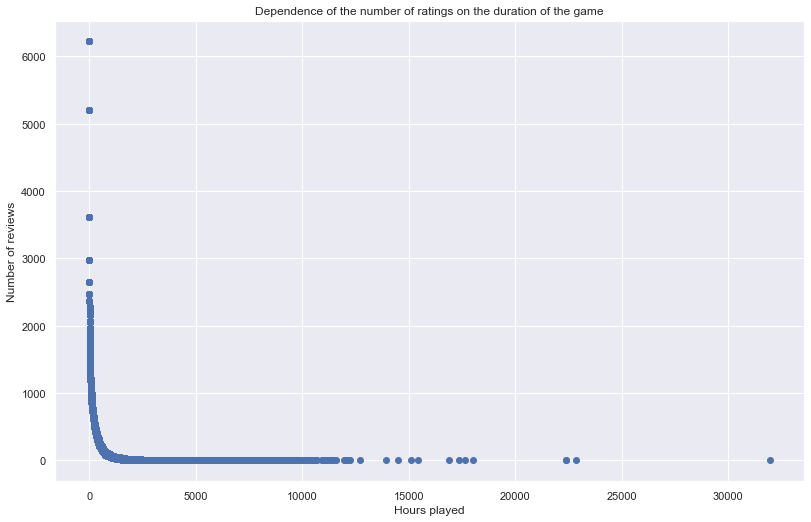

In [52]:
steam_review['hour_played_reviews'] = steam_review.groupby('hour_played')['hour_played'].transform('count')
x = steam_review.hour_played
y = steam_review['hour_played_reviews']
fig = plt.figure(figsize = (13,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x,y)
ax.set_title('Dependence of the number of ratings on the duration of the game')
ax.set_xlabel('Hours played')
ax.set_ylabel('Number of reviews')

In [53]:
top_games = steam_review.title.value_counts()
print("Top 10 games are\n\n",steam_review.title.value_counts()[:10])

Top 10 games are

 PLAYERUNKNOWN'S BATTLEGROUNDS                  144846
Grand Theft Auto V                              99677
Rust                                            70907
Rocket League®                                  67765
Dead by Daylight                                22178
MONSTER HUNTER: WORLD                           18390
ASTRONEER                                        2658
The Elder Scrolls V: Skyrim Special Edition      1471
RESIDENT EVIL 2 / BIOHAZARD RE:2                 1384
Sid Meier’s Civilization® VI                      522
Name: title, dtype: int64


In [54]:
steam_review['review_length'] = steam_review.apply(lambda row: len(str(row['review'])), axis=1)

steam_review['recommendation_int'] = steam_review['recommendation'] == 'Recommended'
steam_review['recommendation_int'] = steam_review['recommendation_int'].astype(int)

<AxesSubplot:xlabel='review', ylabel='title'>

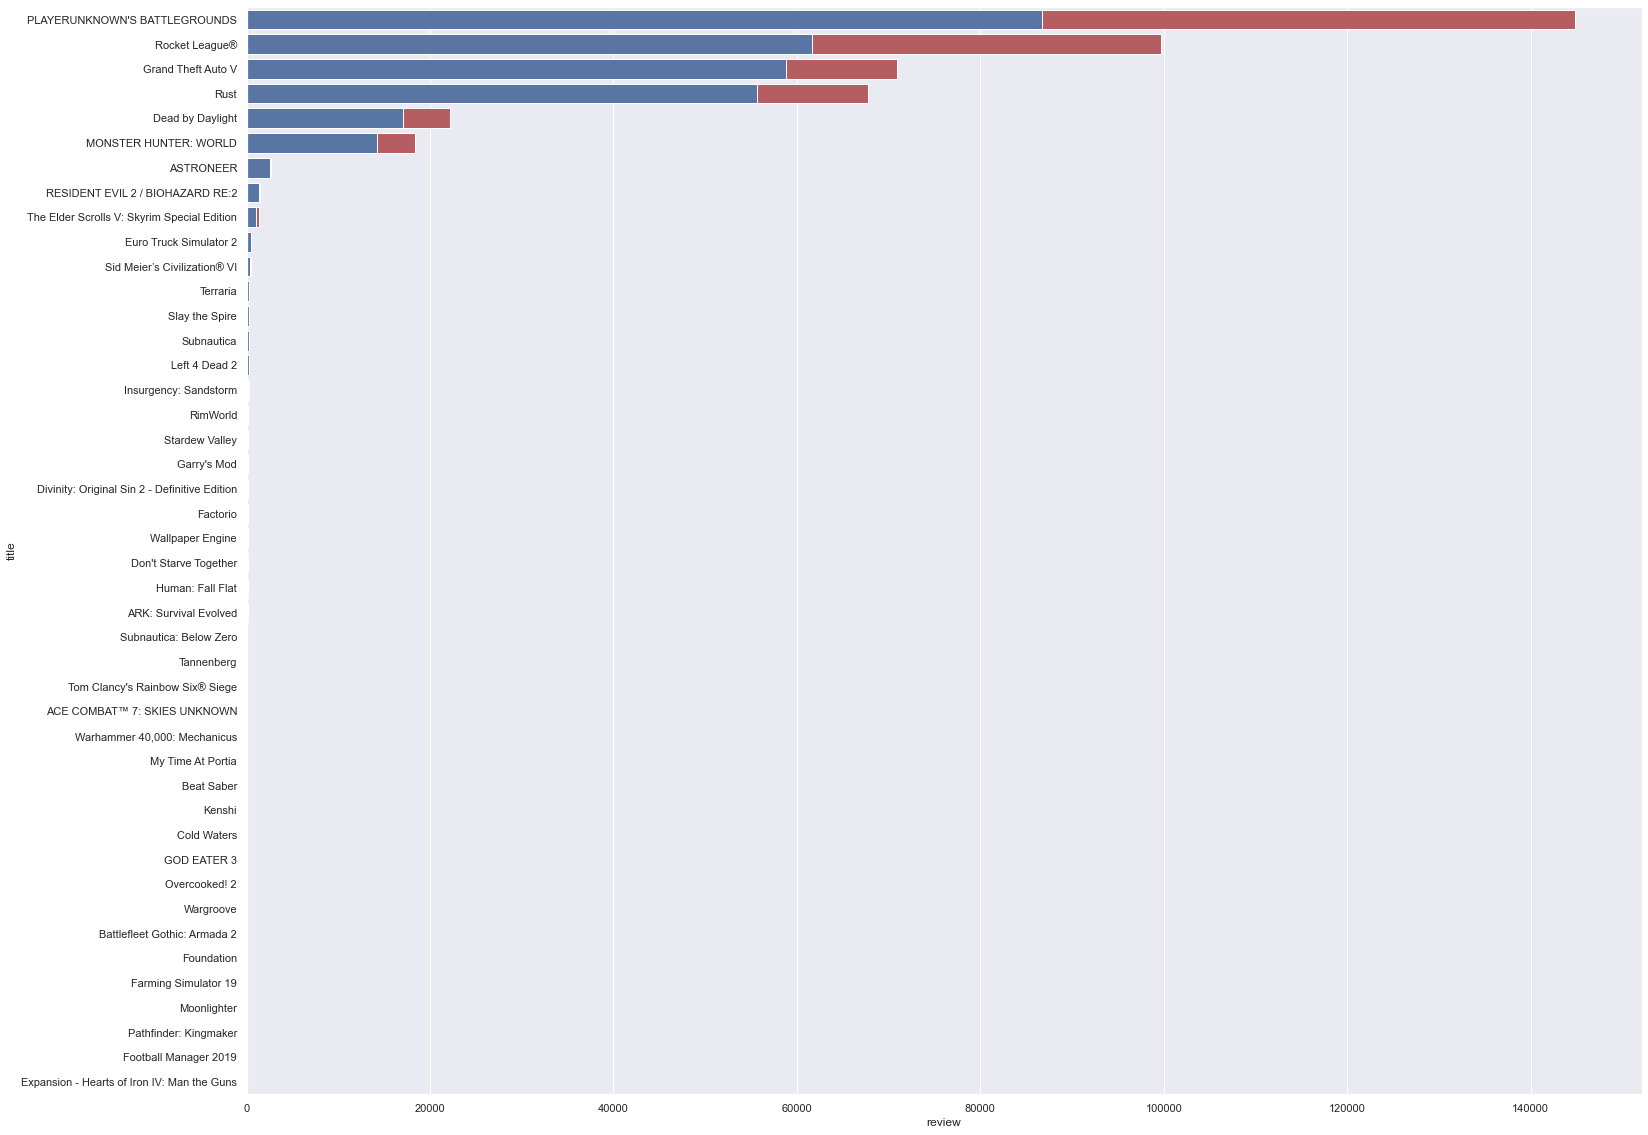

In [55]:
reviews_count = steam_review.groupby(['title'])['review'].count().sort_values(ascending=False)

reviews_count = reviews_count.reset_index()

sns.set(style="darkgrid")
plt.figure(figsize=(25,20))
sns.barplot(y=reviews_count['title'], x=reviews_count['review'], data=reviews_count,
            label="Total", color="r")

reviews_count_pos = steam_review.groupby(['title', 'recommendation_int'])['review'].count().sort_values(ascending=False)
reviews_count_pos = reviews_count_pos.reset_index()
reviews_count_pos = reviews_count_pos[reviews_count_pos['recommendation_int'] == 1]
sns.barplot(y=reviews_count_pos['title'], x=reviews_count_pos['review'], data=reviews_count_pos,
            label="Total", color="b")